In [1]:
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Stats tools
from scipy.stats import kurtosis, skew # For skew and kurtosis
import statsmodels.formula.api as sm # For OLS
import statsmodels.stats.outliers_influence as oi # for RESET 

In [2]:
all_data = pd.read_csv('bwages.csv')

In [3]:
all_data.describe()

,wage,lnwage,educ,exper,lnexper,lneduc,male
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,11.050616,2.334394,3.378397,17.217391,2.690671,1.136519,0.606658
std,4.450513,0.362535,1.204522,10.166675,0.729217,0.433972,0.488658
min,2.190978,0.784348,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.112879,2.093453,3.000000,9.000000,2.302585,1.098612,0.000000
50%,10.126653,2.315170,3.000000,16.500000,2.861793,1.098612,1.000000
75%,12.755446,2.545958,4.000000,24.000000,3.218876,1.386294,1.000000
max,47.575523,3.862318,5.000000,47.000000,3.871201,1.609438,1.000000


In [4]:
all_data[all_data['male'] == 0].describe()

,wage,lnwage,educ,exper,lnexper,lneduc,male
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.0
mean,10.261544,2.266694,3.587219,15.203800,2.559102,1.217806,0.0
std,3.808585,0.351108,1.086521,9.704987,0.737986,0.375220,0.0
min,2.190978,0.784348,1.000000,0.000000,0.000000,0.000000,0.0
25%,7.792486,2.053160,3.000000,7.000000,2.079442,1.098612,0.0
50%,9.507280,2.252058,4.000000,14.000000,2.708050,1.386294,0.0
75%,11.972131,2.482582,4.000000,22.000000,3.135494,1.386294,0.0
max,33.803661,3.520569,5.000000,47.000000,3.871201,1.609438,0.0


In [5]:
all_data[all_data['male'] == 1].describe()

,wage,lnwage,educ,exper,lnexper,lneduc,male
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.0
mean,11.562231,2.378290,3.243001,18.522956,2.775977,1.083814,1.0
std,4.753789,0.363262,1.257386,10.251041,0.710982,0.460737,0.0
min,3.467042,1.243302,1.000000,0.000000,0.000000,0.000000,1.0
25%,8.450915,2.134275,2.000000,11.000000,2.484907,0.693147,1.0
50%,10.481483,2.349610,3.000000,18.000000,2.944439,1.098612,1.0
75%,13.380616,2.593807,4.000000,26.000000,3.295837,1.386294,1.0
max,47.575523,3.862318,5.000000,46.000000,3.850147,1.609438,1.0


In [6]:
first_model = sm.ols(formula="wage ~ male + exper + educ", data=all_data).fit()
print(first_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          1.63e-144
Time:                        14:50:59   Log-Likelihood:                -3951.0
No. Observations:                1472   AIC:                             7910.
Df Residuals:                    1468   BIC:                             7931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2137      0.387      0.552      0.5

In [7]:
second_model = sm.ols(formula="wage ~ male + exper + np.power(exper, 2) + educ", data=all_data).fit()
print(second_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     223.2
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          1.04e-149
Time:                        14:50:59   Log-Likelihood:                -3936.0
No. Observations:                1472   AIC:                             7882.
Df Residuals:                    1467   BIC:                             7909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8925      0

In [20]:
# from statsmodels.api import graphics
# a = graphics.plot_fit(second_model, "motifScore")

# import seaborn as sns
# sns.regplot(x='motifScore', y='expression', data=second_model)

In [17]:
pred_val = second_model.fittedvalues.copy()
true_val = all_data['wage'].values.copy()
residual = true_val - pred_val

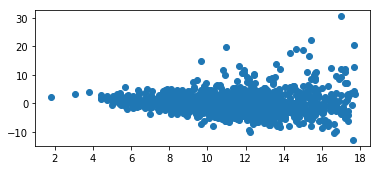

In [19]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val, residual)

In [31]:
third_model = sm.ols(formula="np.log(wage) ~ male + np.log(exper) + np.power(np.log(exper), 2) + np.log(educ)", data=all_data[all_data['exper'] != 0]).fit()
print(third_model.summary())


                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          2.76e-148
Time:                        15:20:57   Log-Likelihood:                -245.18
No. Observations:                1467   AIC:                             500.4
Df Residuals:                    1462   BIC:                             526.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

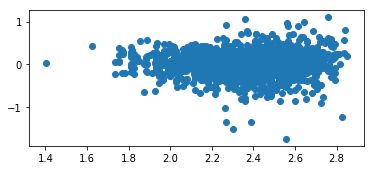

In [33]:
pred_val = third_model.fittedvalues.copy()
true_val = np.log(all_data[all_data['exper'] != 0]['wage'].values.copy())
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val, residual)

In [35]:
# Not drop the squared term
third_model = sm.ols(formula="np.log(wage) ~ male + np.log(exper) + np.log(educ)", data=all_data[all_data['exper'] != 0]).fit()
print(third_model.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     289.7
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          1.35e-147
Time:                        15:23:16   Log-Likelihood:                -249.71
No. Observations:                1467   AIC:                             507.4
Df Residuals:                    1463   BIC:                             528.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2379      0.038     32.434

NameError: name 'sms' is not defined